In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

In [2]:
n = 10
m = 60
X = np.zeros((m,n))
for i in range(n):
    var = np.random.uniform(0,1)*0.1
    X[:,i]= np.random.normal(loc=0,scale=var,size=m)

dates = pd.date_range(start='2007-01-01',end='2011-12-31',freq='M')
df = pd.DataFrame(index = dates)
for i in range(n):
    df[i] = X[:,i]

In [21]:
df.tail()

,0,1,2,3,4,5,6,7,8,9
2011-08-31,-0.004254,0.002305,0.013590,-0.012598,-0.011140,-0.003316,0.111123,0.046695,0.100915,-0.017070
2011-09-30,0.152177,-0.001184,-0.049388,-0.004639,0.004161,-0.000443,0.067632,-0.175325,-0.034309,0.016321
2011-10-31,-0.066248,0.001833,-0.055375,0.030606,-0.000752,-0.002849,-0.033094,-0.074611,-0.012808,-0.031287
2011-11-30,0.037594,0.001453,-0.026361,-0.004169,-0.014911,0.000650,0.041237,-0.011875,-0.038288,0.040601
2011-12-31,0.014354,0.002425,0.014113,-0.027417,0.036957,0.002225,0.022896,0.011174,0.018593,-0.024571


In [22]:
def sharpe(s):
    return np.sqrt(12)*(np.mean(s)/np.std(s))
sharpe(df)

0   -0.282635
1    0.281773
2    0.223713
3   -0.377717
4    0.419452
5   -0.247947
6    0.840149
7    0.056728
8   -0.276693
9    0.031270
dtype: float64

In [23]:
rolling_sharpe = (np.sqrt(12))*df.rolling(5).mean()/df.rolling(5).std()
rolling_sharpe.tail()

,0,1,2,3,4,5,6,7,8,9
2011-08-31,-1.079656,1.443909,2.863442,-2.409353,1.285249,-3.750981,3.169678,-0.009016,-0.454371,0.601849
2011-09-30,1.115493,0.042070,-0.087476,-4.962211,0.888355,-2.864351,3.924219,-2.261175,-1.396482,-0.138892
2011-10-31,0.919083,-0.199384,-2.030362,-0.543530,1.582485,-6.924276,2.426731,-2.288046,-0.809636,-2.599697
2011-11-30,1.444971,0.719198,-3.017099,-0.421708,0.309368,-3.435065,3.225679,-2.716450,-0.776416,-0.030906
2011-12-31,1.156918,3.203876,-2.149411,-0.591752,0.482589,-1.105688,2.717932,-1.619874,0.412789,-0.362752


In [24]:
exp_avg = rolling_sharpe.ewm(alpha=0.01, freq="5M").mean()
exp_avg

,0,1,2,3,4,5,6,7,8,9
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-30,-0.412464,-0.355136,0.365596,-1.424757,-1.533234,5.699215,2.491668,-0.843902,-2.976773,-0.240830
2007-11-30,-0.237147,1.403583,1.252939,-1.925845,1.024110,2.067070,0.428559,-0.815331,-1.415659,0.689115
2008-04-30,-0.363356,1.189188,1.281670,-1.140288,0.271150,1.309139,0.584480,0.019341,-1.900149,-0.197982
2008-09-30,-1.595367,0.466427,-0.412908,-1.597389,-0.193143,1.253282,1.421906,1.158037,-1.229274,-0.939452
2009-02-28,-0.950848,0.923616,-0.458265,-1.345053,0.990938,1.043007,1.467407,0.779787,-0.939614,-1.157496
2009-07-31,-0.701206,0.036595,0.210524,-0.660645,0.567482,0.668210,0.850284,1.117777,0.055729,-0.985073
2009-12-31,-0.779380,0.284981,0.225995,-0.635524,0.972387,0.588405,1.072410,0.836752,0.008386,-0.519263
2010-05-31,-0.431406,-0.816875,0.193487,-0.404781,0.693465,0.549472,0.543992,0.655507,-0.923210,-0.174846
2010-10-31,-0.337056,-0.453454,-0.098851,-0.459910,0.756483,0.587583,0.368146,0.431245,-1.124502,-0.273489


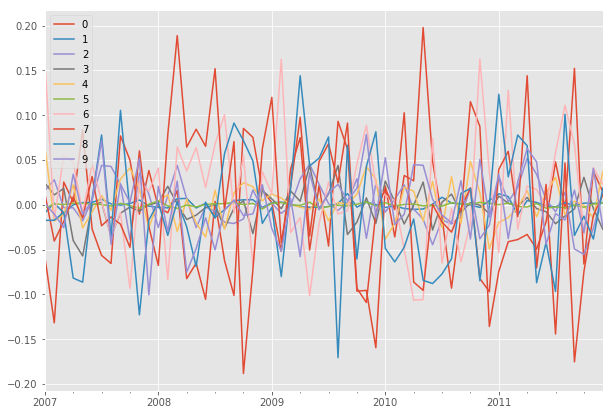

In [17]:
df.plot(figsize=(10,7))

In [50]:
features = pd.DataFrame(index=df.columns)
features['mean'] = df.mean().values
features['var'] = df.var().values
features['sharpe'] = sharpe(df).values

In [51]:
features

,mean,var,sharpe
0,-0.005801,0.005142,-0.282635
1,0.000408,0.000026,0.281773
2,0.001615,0.000636,0.223713
3,-0.002074,0.000368,-0.377717
4,0.002791,0.000540,0.419452
5,-0.000149,0.000004,-0.247947
6,0.015156,0.003971,0.840149
7,0.001244,0.005864,0.056728
8,-0.005225,0.004351,-0.276693
9,0.000329,0.001352,0.031270


In [52]:
x = features.as_matrix()

In [53]:
x

array([[ -5.80145705e-03,   5.14166726e-03,  -2.82634608e-01],
       [  4.07703767e-04,   2.55489265e-05,   2.81772522e-01],
       [  1.61502289e-03,   6.36000139e-04,   2.23712535e-01],
       [ -2.07366003e-03,   3.67809997e-04,  -3.77716568e-01],
       [  2.79139393e-03,   5.40454067e-04,   4.19451718e-01],
       [ -1.48657201e-04,   4.38667020e-06,  -2.47946911e-01],
       [  1.51560321e-02,   3.97136003e-03,   8.40148641e-01],
       [  1.24353151e-03,   5.86410405e-03,   5.67278340e-02],
       [ -5.22476435e-03,   4.35127380e-03,  -2.76693364e-01],
       [  3.29148399e-04,   1.35209918e-03,   3.12699880e-02]])

In [62]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [91]:
data = scale(features)


In [92]:
#pca = PCA(n_components=2).fit(data)
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

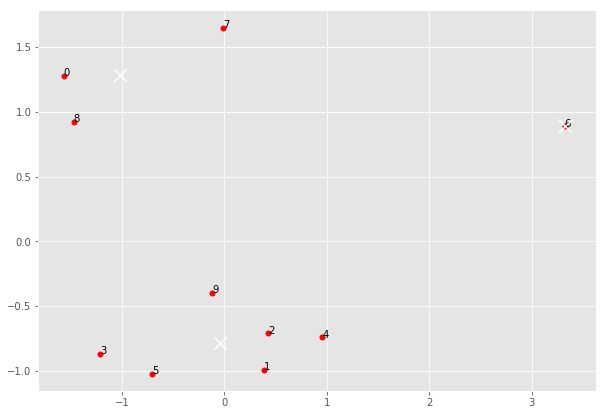

In [94]:
plt.figure(figsize=(10,7))
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'r.', markersize=10)
for i,t in enumerate(df.columns):
    plt.annotate(str(t),xy=(reduced_data[i,0], reduced_data[i,1]))
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)